In [64]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [65]:
# Load the images
image1 = cv2.imread('../data/front.png')
image2 = cv2.imread('../data/left.png')

In [66]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

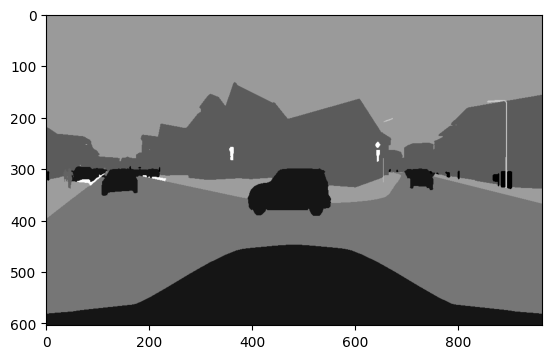

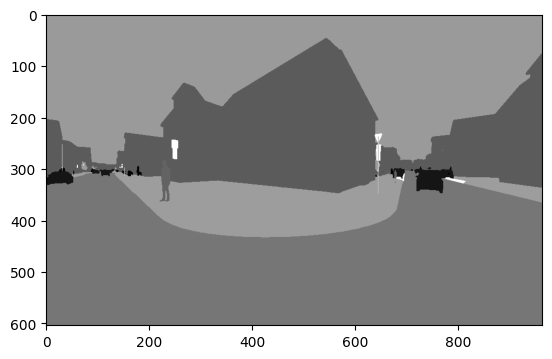

In [67]:
plt.imshow(gray1, cmap='gray')
plt.show()
plt.imshow(gray2, cmap='gray')

In [68]:
sift = cv2.SIFT_create()

In [69]:
# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None, )
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)


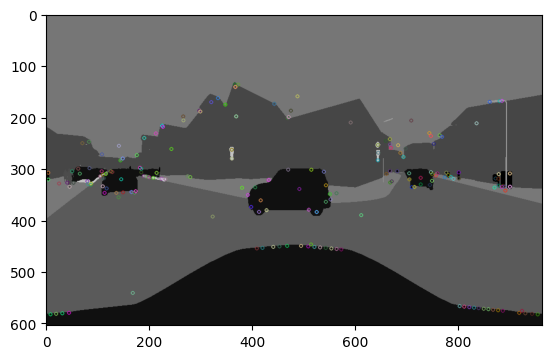

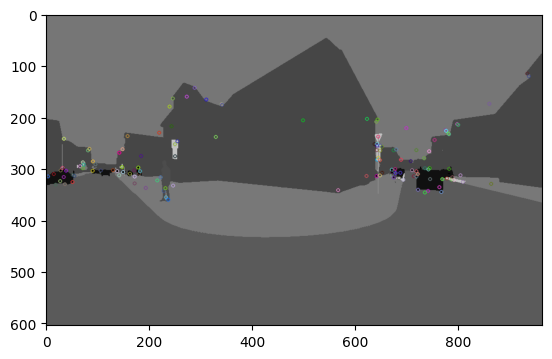

In [70]:
plt.imshow(cv2.drawKeypoints(gray1, keypoints1, None, flags=0))
plt.show()
plt.imshow(cv2.drawKeypoints(gray2, keypoints2, None, flags=0))

In [71]:
# matches = cv2.BFMatcher().knnMatch(descriptors2, descriptors1, k=2)
matches = cv2.BFMatcher().match(descriptors2, descriptors1)

In [72]:
good_matches = sorted(matches, key=lambda x: x.distance)

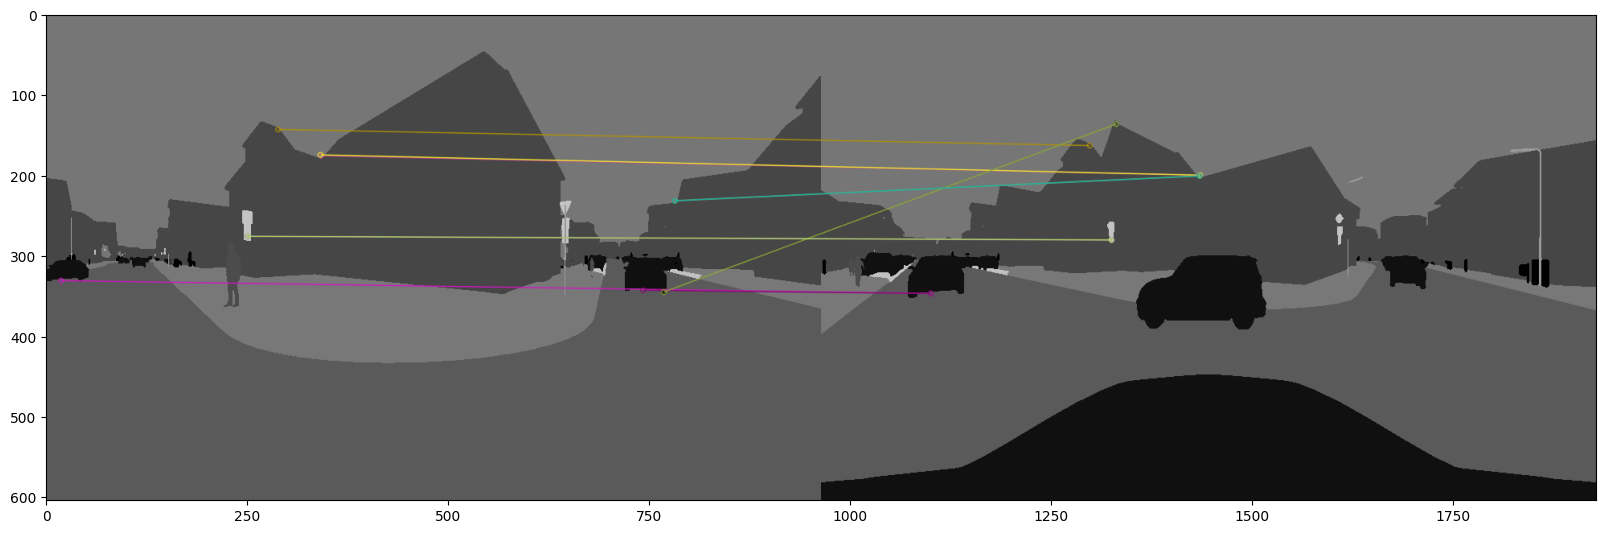

In [73]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.drawMatches(gray2, keypoints2, gray1, keypoints1, good_matches[:10], None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS))

In [74]:
src_points = np.float32([keypoints1[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)

In [84]:
homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

In [85]:
result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))

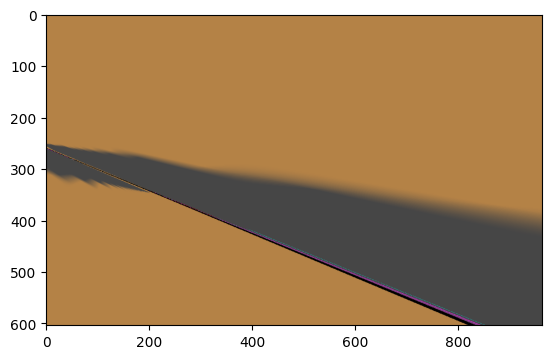

In [86]:
plt.imshow(result)

In [78]:
alpha = 0.5
blended_image = cv2.addWeighted(result, alpha, image2, 1 - alpha, 0)


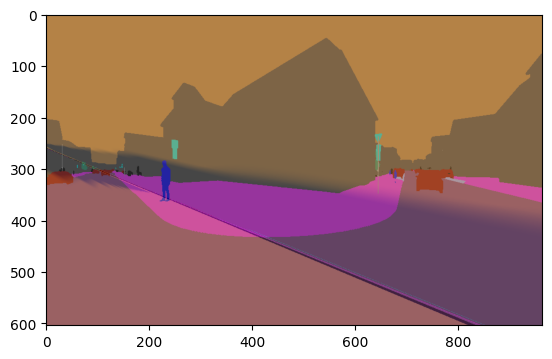

In [87]:
plt.imshow(blended_image)

In [103]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.3)

In [81]:
# stitcher.stitch([result, image2])

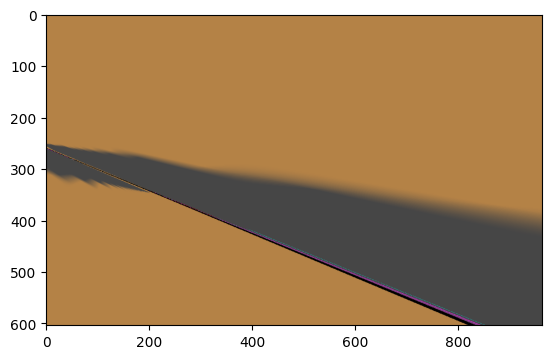

In [82]:
plt.imshow(result)

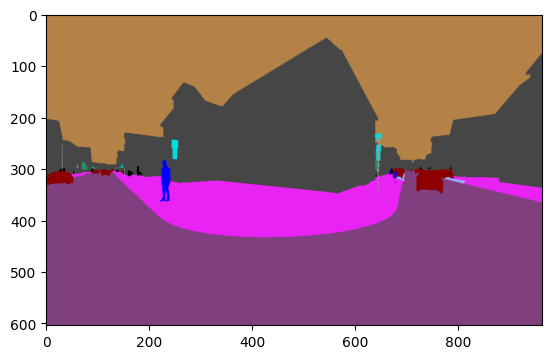

In [89]:
plt.imshow(image2)

In [91]:
left_copy = image2.copy()

In [105]:
stitcher.stitch([left_copy, image1])

(0,
 array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [126,  62, 126],
         [126,  62, 126],
         [126,  62, 126]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [126,  62, 126],
         [126,  62, 126],
         [126,  62, 126]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [126,  61, 126]

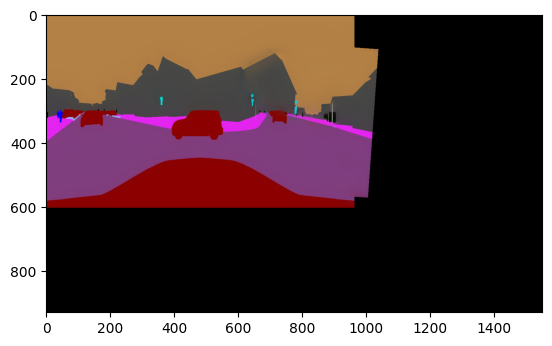

In [108]:
plt.imshow(stitcher.stitch([image1, left_copy])[1])

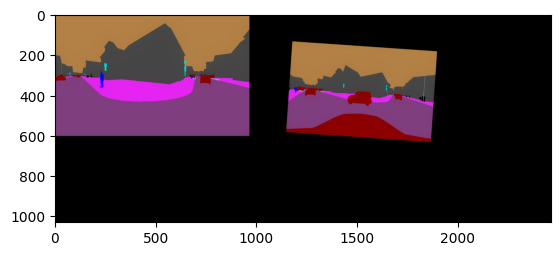

In [102]:
plt.imshow(Out[100][1])

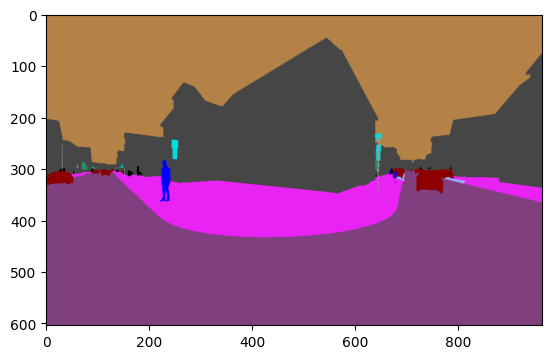

In [94]:
plt.imshow(left_copy)

In [95]:
cv2.STITCHER_ERR_NEED_MORE_IMGS

1